# Steady-state space-charge-limited current with traps 

This example shows how to simulate effects of a single trap level on current-voltage characteristics of a single carrier device.



In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import oedes
import numpy as np
oedes.init_notebook() # for displaying progress bars 

## Model and parameters

Electron only device is simulated, without contact barrier. Note that more trap levels can be included by modifying traps= argument below. Each trap level should have unique name.

In [2]:
L = 200e-9 # device thickness, m
model = oedes.models.std.electrononly(L, traps=['trap'])

In [3]:
params = {
    'T': 300, # K
    'electrode0.workfunction': 0, # eV
    'electrode1.workfunction': 0, # eV
    'electron.level': 0, # eV
    'electron.mu': 1e-9, # m2/(Vs)
    'electron.N0': 2.4e26, # 1/m^3
    'electron.trap.level': 0, # eV
    'electron.trap.trate': 1e-22, # 1/(m^3 s)
    'electron.trap.N0': 6.2e22, # 1/m^3
    'electrode0.voltage': 0, # V
    'electrode1.voltage': 0, # V
    'epsilon_r': 3. # 1
}

### Sweep parameters

For simplicity, the case of absent traps is modeled by putting trap level 1 eV above transport level. This makes trap states effectively unoccupied.

In [4]:
traplevel_sweep = oedes.sweep('electron.trap.level',np.asarray([0.45, 0.33, 0.21, -1.]))
voltage_sweep = oedes.sweep('electrode0.voltage', np.logspace(-3, np.log10(20.), 100))

## Result

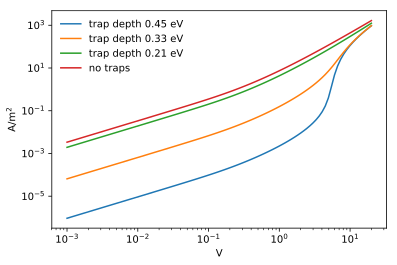

In [5]:
c=oedes.context(model)

for tdepth,ct in c.sweep(params, traplevel_sweep):
    for _ in ct.sweep(ct.params, voltage_sweep):
        pass
    v,j = ct.teval(voltage_sweep.parameter_name,'J')
    oedes.testing.store(j, rtol=1e-3) # for automatic testing
    if tdepth < 0:
        label = 'no traps'
    else:
        label = 'trap depth %s eV' % tdepth
    plt.plot(v,j,label=label)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('V')
plt.ylabel(r'$\mathrm{A/m^2}$')
plt.legend(loc=0,frameon=False);


---
This file is a part of __oedes__, an open source organic electronic device 
simulator. For more information, see <https://www.github.com/mzszym/oedes>.
